PROC ANOVA
==================
CLASS: ind var  
MEANS: give mean of dependent(levels) for each level of indep var(music)

### TWO WAY ANOVA= Factorial Designs=Crossed Design: 2 indep
use | to separate 2 indep var in MODEL stmt
when computer terminal don't have \"|\" symbol use, if we don't include |, none of the interaction will be estimated  
For GROUP|GENDER|DOSE:
```
GROUP GENDER DOSE GROUP*GENDER GROUP*DOSE GENDER*DOSE GROUP*GENDER*DOSE
```
combination of indep1 and indep2 is called a cell  
the combination of indep1 and indep2 provides us with another source of variation (called an interaction)

#### Balanced Design(Orthogonal): same number of subjects in each cell  
When we have more than one independent variable in our mode, we cannot use PROC ANOVA if our design is unbalanced.  
For unbalanced designs. PROC GLM(general linear model) is used instead.  

### POST HOC for multiple comparison test: after reject H_0: mean(x) = mean(y) = mean(z)
if the ANOVA is not significant, WE SHOULD NOT LOOK FURTHER AT THE POST HOC TEST RESULTS  
```
MEANS GROUP/ DUNCAN SNK LSD TURKEY SCHEFFE
```

#### DUNCAN GROUPING
any groups that are not significantly different from one another will have the same letter in the Grouping column


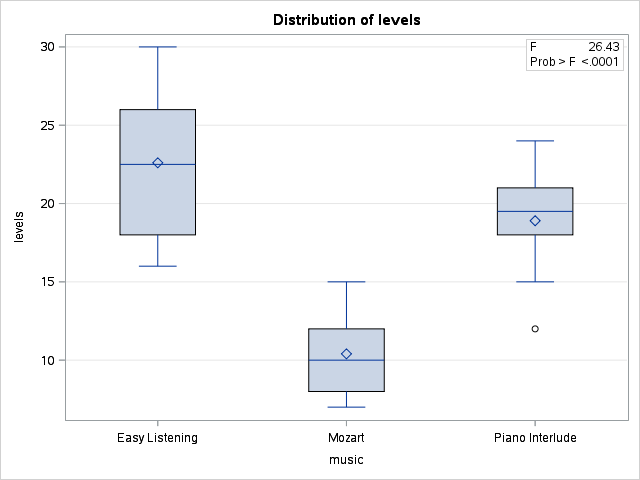
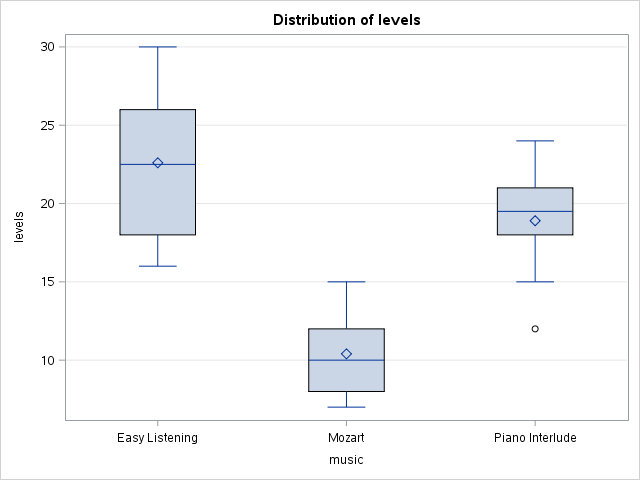

In [4]:
*Unbalanced Data;
DATA agitation_level;
length gender$ 20;
DO music="Piano Interlude", "Mozart", "Easy Listening";
	DO stage="Early Stage","Late Stage";
		DO i=1 TO 5;
			if i le 2 then gender="male";
			else gender="female";
			input levels @@;
			output;
		END;
	END;
END;

DATALINES;
21 24 22 18 20 
12 15 18 20 19
9 7 9 8 12 
15 8 12 13 11
29 26 30 24 26
17 19 21 18 16
;

PROC SORT DATA=agitation_level;
BY levels;
run;
*to test if the means are the same or different;

PROC ANOVA DATA=agitation_level;
TITLE "ONE-WAY ANOVA";
CLASS music;
model levels=music;
means music/tukey snk ALPHA=.05;
run;
/*
Ho: The mean level of agitation is the same for patients
Ha: The mean level of agitation is not the same for patients
*/

PROC GLM: PLANNED COMPARISONS or a priori comparisons with INTERACTION graph
================================================================================
does not give you any protection against type I error  
you want to make some specific comparisons: new method X VS traditional Y and Z  methods  
CONTRAST 'label for this contrast' indVar kCoeff: k is the number of levels of the class variable  

Coding k vector:
1. sum of the coefficients must add to zero
2. The order of coefficients matches the alphanumeric order of the level of the CLASS variable if it is not formatted.
If you associated a format with the CLASS variable, the order is determined by the formatted values (you can override this by specifying the PROC GLM option, ORDER = DATA, which will order the levels of the CLASS variable byt he data values, not the formatted values)
3. a zero coefficient means that you do not want to include the corresponding level int he comparison
4. levels with negative coefficients are compared to levels with positive coefficients

### Must first understand Interaction Effect before we examine Main Effect
when strong interaction effect occur, main effect in ANOVA can be misleading  
The best way of explaining two-way interaction is to take cell means and plot them.  

It is not possible to understand activity level of children just by knowing whether they had ritalin.  
For Example:  
RITALIN: Hyperactive is lower activity & Normal is increase
PLACEBO: Hyperactive is higher & Normal is decrease  
The big interactive effect FLIP the main effect  

If we really want to study the effect of ritalin, we should look separately at normal and hyperactive children
For each of these groups we have two levels of the DRUG. We can do a ttest between placebo and ritalin within the normal and hyperactive group. Check which group has higher mean.


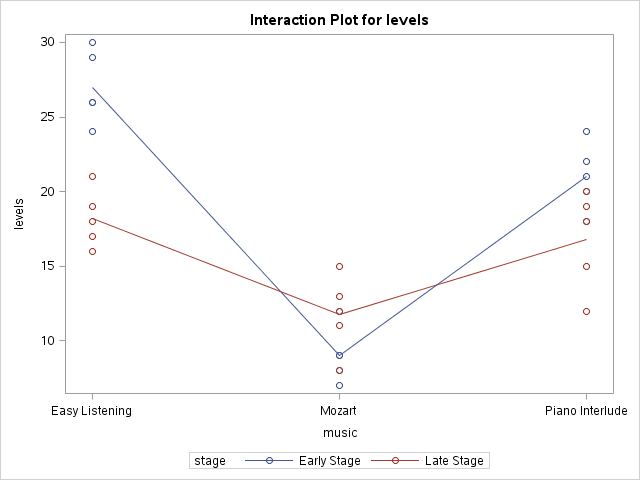
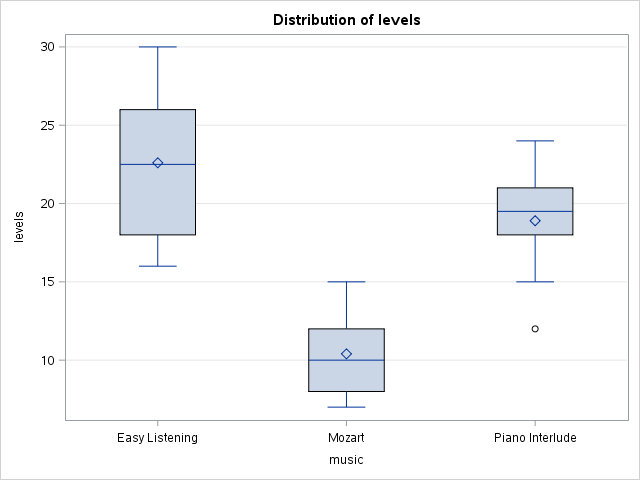
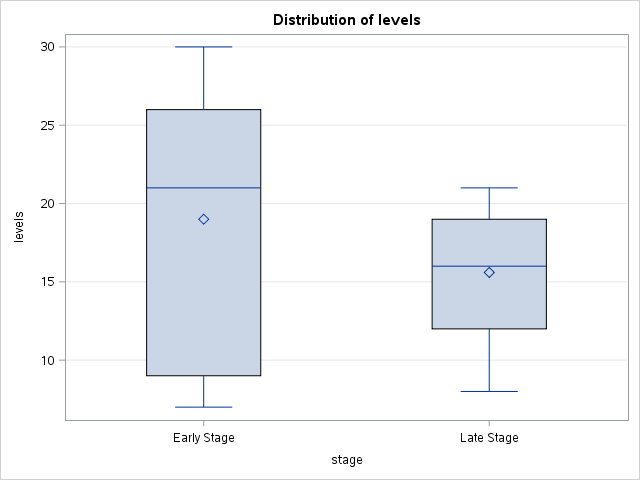
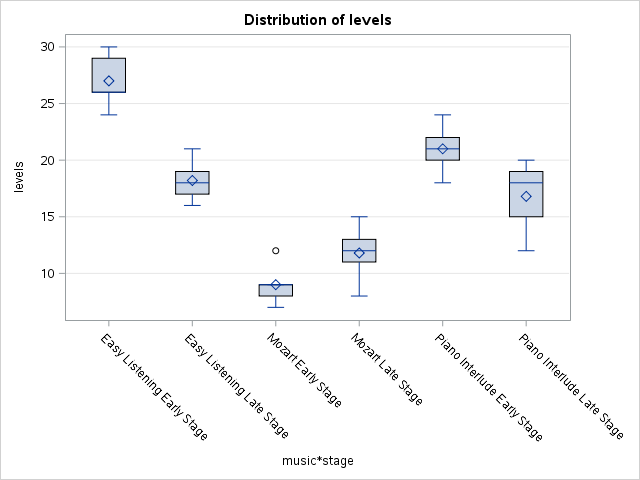
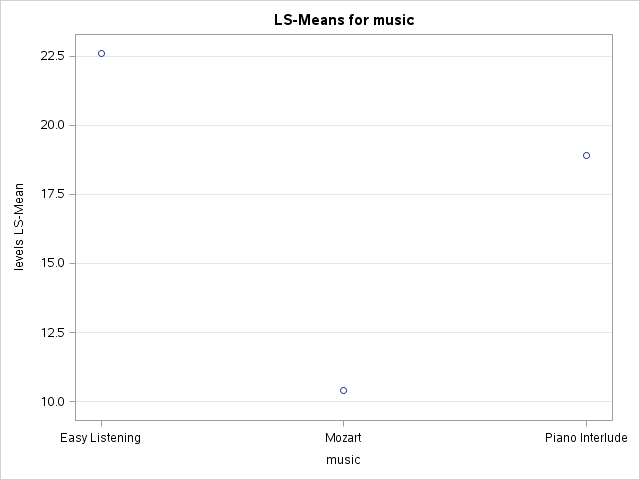
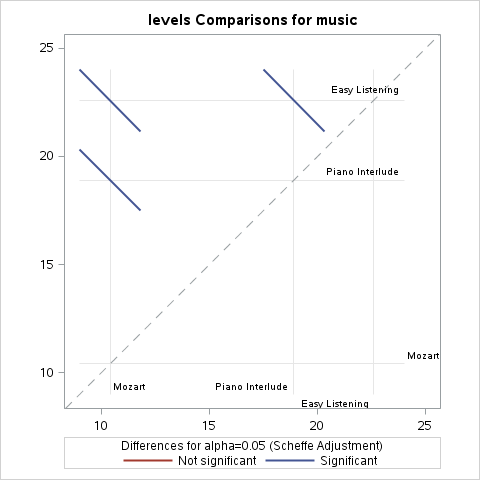
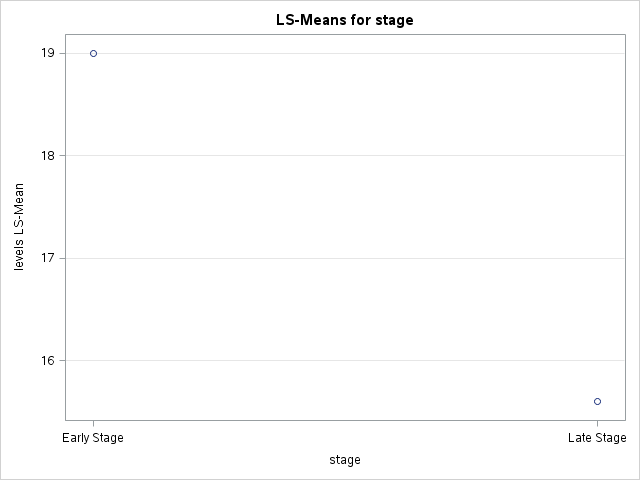
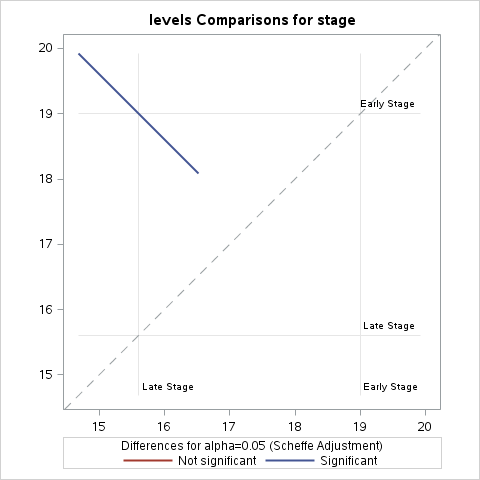
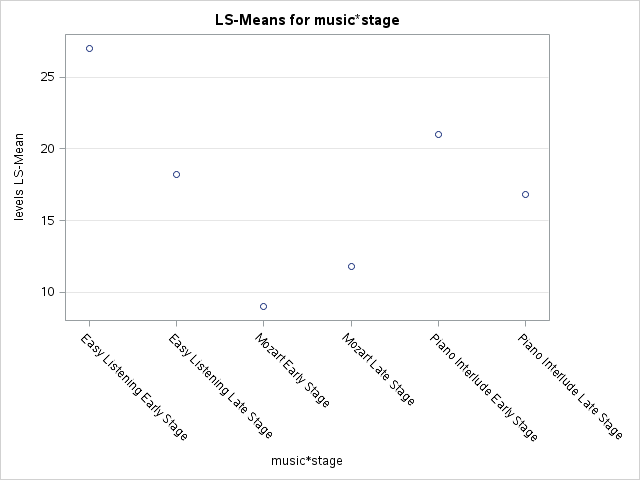
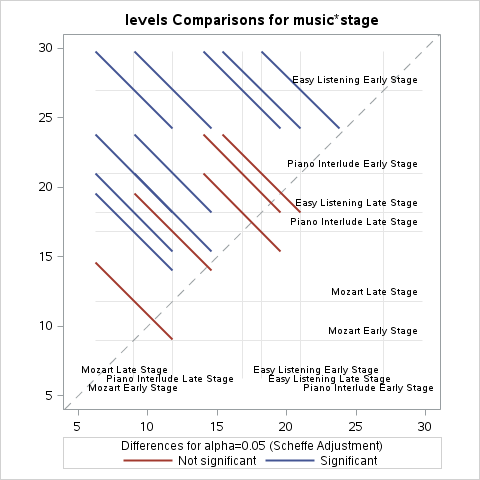

In [3]:
PROC SORT DATA=agitation_level;
BY levels;
run;
*to test if the means are the same or different;
PROC GLM DATA=agitation_level; *ANOVA dont show interaction plot;
TITLE "TWO-WAY ANOVA";
CLASS music stage;
model levels = music | stage;
CONTRAST 'Easy Listening VS Mozart' music 1 -1 0;
CONTRAST 'Easy Listening VS Piano Interlude' music 1 0 -1;
MEANS music | stage;
lsmeans music | stage/ adjust=scheffe ; *tukey , sidak , sheffe , bonferroni (bon) ;
run;

In [5]:
PROC MEANS DATA=agitation_level NWAY NOPRINT;
CLASS music stage;
VAR levels;
OUTPUT OUT=MEANS MEAN=;
RUN;


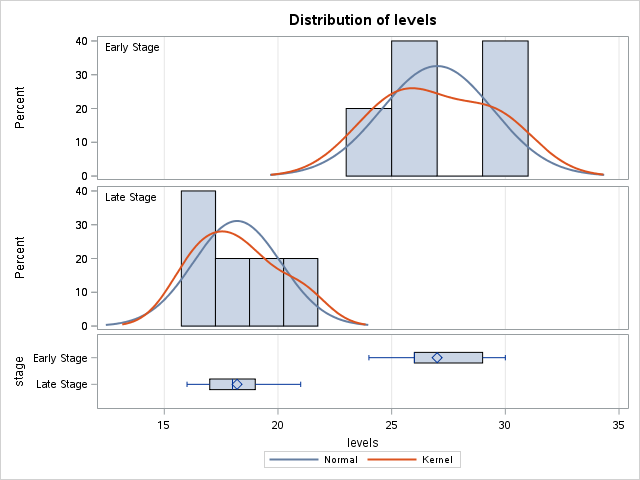
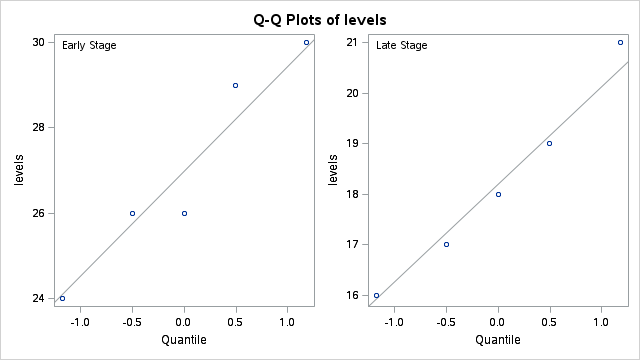
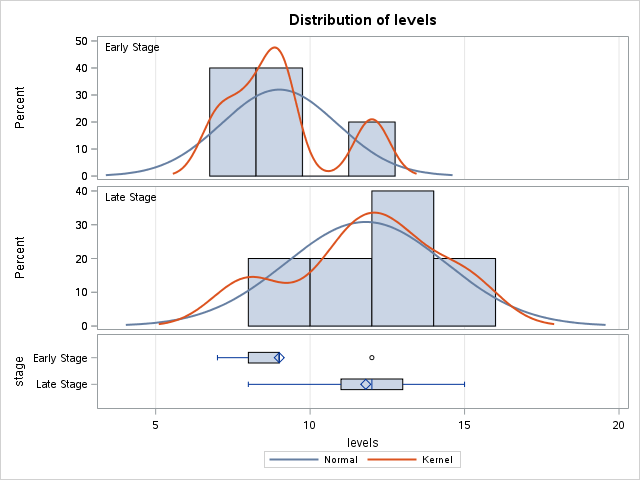
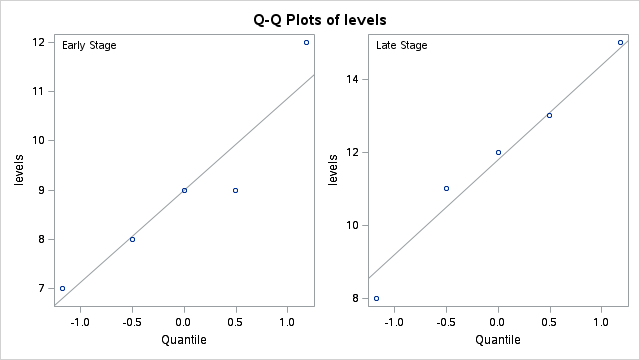
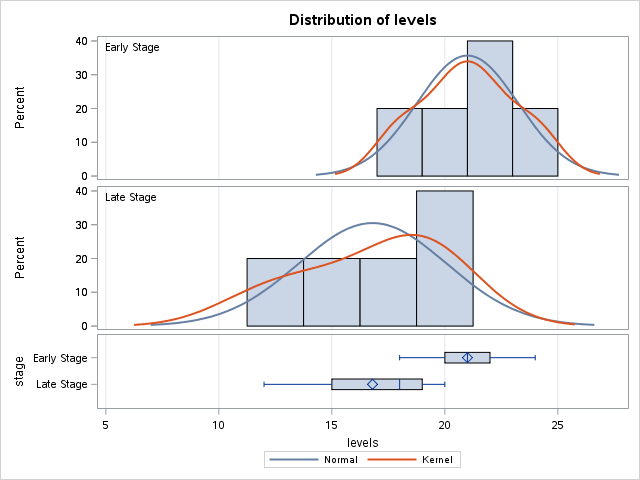
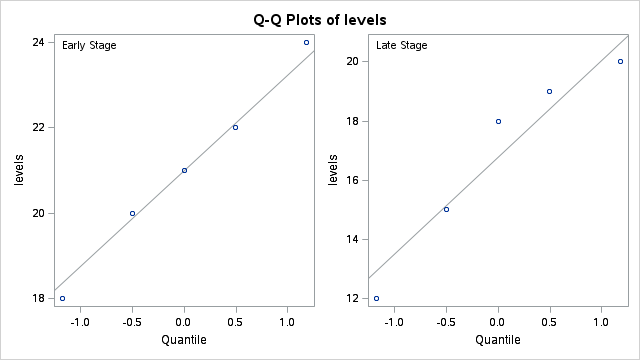

In [8]:
PROC SORT DATA=agitation_level;
BY music;
run;

PROC TTEST DATA=agitation_level;
BY music;
CLASS stage;
VAR levels;
RUN